# **Pymaceuticals Inc.**
---
## Module 5- Matplotlib Challenge
### By: Zack Crowley
- Started Sun 10/23/22

### **Analysis**
- Add your analysis here!!!

Submission <br> 

    Review all the figures and tables that you generated in this assignment. Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook.

- Update readme before turning in!!!
 
 ---

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice:
uni_mice_id = len(mouse_df["Mouse ID"].unique())
print(f'The number of unique mice ID is: {uni_mice_id}')


The number of unique mice ID is: 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_ID_time = mouse_df.loc[mouse_df.duplicated(), :] 
mouse_ID_time["Mouse ID"]


137    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_ID = mouse_df[mouse_df["Mouse ID"] == "g989"]   
dup_mouse_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID:
mouse_clean_df = mouse_df.drop(mouse_df[(mouse_df["Mouse ID"] == "g989")].index,axis=0)     
# Mouse ID g989 no longer in the new df:
mouse_clean_df[mouse_df["Mouse ID"] == "g989"]   

/Users/zackcrowley/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [7]:
# Checking the number of mice in the clean DataFrame.
uni_Clean_mice_id = len(mouse_clean_df["Mouse ID"].unique())
print(f'Now, the number of unique mice ID in the clean df is: {uni_Clean_mice_id}')


Now, the number of unique mice ID in the clean df is: 248


## **Summary Statistics**

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# First, create a groupby object of "Drug Regimen", for only the col = "Tumor Volume (mm3)":
group_drug_tumor = mouse_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# Then, generate the summary statists:
drug_tumor_mean = group_drug_tumor.mean()
drug_tumor_median = group_drug_tumor.median()
drug_tumor_var = group_drug_tumor.var()
drug_tumor_std = group_drug_tumor.std()
drug_tumor_sem = group_drug_tumor.sem()

# Next, assemble the resulting series into a single summary DataFrame called "drug_tumor_summ_df":
# drug_tumor_summ_df = pd.DataFrame()
# drug_tumor_summ_df["Mean"] = drug_tumor_mean
drug_tumor_summ_df =  pd.DataFrame({'Mean Tumor Volume': drug_tumor_mean, 
                                    'Median Tumor Volume': drug_tumor_median, 
                                    'Tumor Volume Variance':drug_tumor_var, 
                                    'Tumor Volume Std. Dev.':drug_tumor_std, 
                                    'Tumor Volume Std. Err.':drug_tumor_sem}) 

drug_tumor_summ_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_tumor_summ_df_agg = mouse_clean_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': 
                                                                    ["mean", "median", "var", "std", "sem"] })
drug_tumor_summ_df_agg



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## **Bar and Pie Charts**

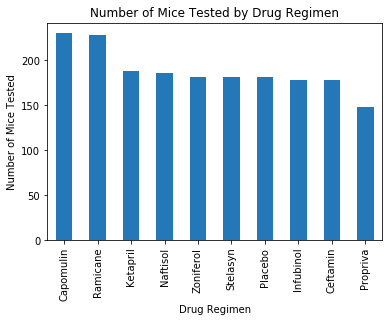

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Count up the mice treated grouped by "Drug Regimen" and sort by descending: mouse_counts
mouse_counts = mouse_clean_df.groupby("Drug Regimen").count()["Mouse ID"].sort_values(ascending=False)
# Create the bar chart using pandas plot: 
mouse_counts.plot(kind="bar", facecolor="#2578B7")
# label y axis and title
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
plt.show()

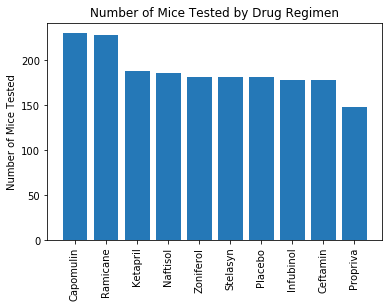

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Create an array the length of mouse_counts to set the x-axis bins:
mouse_x_axis = np.arange(len(mouse_counts))
plt.bar(mouse_x_axis, mouse_counts, color="#2578B7", align="center")
# label y axis and title:
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
# Create labels based on index names = drug names:
mouse_labels = mouse_counts.index 
plt.xticks(mouse_x_axis, mouse_labels,rotation = 90)
plt.show()

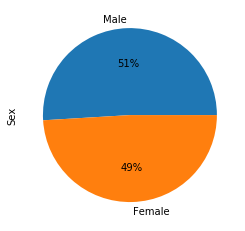

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = mouse_clean_df["Sex"].value_counts()
# Create the pie chart using pandas plot: 
gender_count.plot(kind='pie', y='Mouse ID', autopct='%1.0f%%')
# label the title and show:
plt.show()

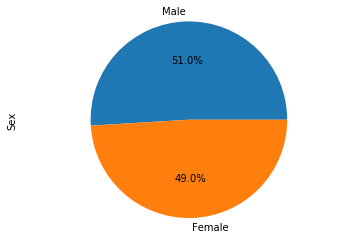

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label_sex = gender_count.index
plt.pie(gender_count, labels=label_sex,autopct="%1.1f%%")
# Create axes which are equal so we have a perfect circle
plt.ylabel("Sex")
plt.axis("equal")
plt.show()



## **Quartiles, Outliers and Boxplots**

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time_mouse_df = mouse_clean_df.groupby("Mouse ID").count()["Timepoint"].sort_values(ascending=False)
last_time_mouse_df = last_time_mouse_df.loc[last_time_mouse_df == 10] 

last_time_mouse_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# name new df= final_tumor_vol_df
final_tumor_vol_df = pd.merge(last_time_mouse_df,mouse_clean_df, how= "left", on =("Mouse ID", "Timepoint"))
final_tumor_vol_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,z969,10,52.656081,1,Naftisol,Male,9,30
1,i177,10,41.020929,0,Ramicane,Male,10,18
2,l509,10,46.759074,0,Capomulin,Male,17,21
3,l471,10,48.182063,0,Ceftamin,Female,7,28
4,k894,10,49.272870,1,Zoniferol,Female,13,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes, 
# For this, I will use loc and isin():
tumor_vol_data = final_tumor_vol_df.loc[final_tumor_vol_df['Drug Regimen'].isin(drugs)]
# Create 4 df, one for each of the drugs and filter to only the col 'Tumor Volume (mm3)', sort each by ascending:
# Capomulin
cap_tumor = (tumor_vol_data.loc[tumor_vol_data["Drug Regimen"]=="Capomulin"]).loc[:,"Tumor Volume (mm3)"]
cap_tumor = cap_tumor.sort_values()
cap_tumor
# Ramicane
ram_tumor = (tumor_vol_data.loc[tumor_vol_data["Drug Regimen"]=="Ramicane"]).loc[:,"Tumor Volume (mm3)"]
ram_tumor = ram_tumor.sort_values()
ram_tumor
# Infubinol
# Ceftamin

# Calculate the IQR, upperbound and lowerbounds for each drug df:

# Determine outliers for each drug (less than lowerbound, greater than upperbound):
# Capomulin
cap_quartiles = cap_tumor.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
cap_outliers = cap_tumor.loc[(cap_tumor < cap_lower_bound) | (cap_tumor > cap_upper_bound)]
print(f"Capomulin's potential outliers: {cap_outliers}")   

# Ramicane
ram_quartiles = ram_tumor.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*cap_iqr)
ram_upper_bound = ram_upperq + (1.5*cap_iqr)
ram_outliers = ram_tumor.loc[(ram_tumor < ram_lower_bound) | (ram_tumor > ram_upper_bound)]
print(f"Ramicane's potential outliers: {ram_outliers}")   

# Infubinol

# Ceftamin
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regiment Distributions')
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data)
plt.show()


## **Line and Scatter Plots**

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

## **Correlation and Regression**

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

